In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_excel('Data Model - Pizza Sales.xlsx')

In [45]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce") 
#making sure dates are not strings

In [46]:
ingredient_info = pd.DataFrame([
    {"ingredient": "Garlic", "unit_cost": 0.05, "unit": "10g", "shelf_life_days": 7},
    {"ingredient": "Tomatoes", "unit_cost": 0.2, "unit": "100g", "shelf_life_days": 10},
    {"ingredient": "Red Onions", "unit_cost": 0.1, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Red Peppers", "unit_cost": 0.15, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Mozzarella Cheese", "unit_cost": 0.5, "unit": "100g", "shelf_life_days": 7},
    {"ingredient": "Pepperoni", "unit_cost": 0.8, "unit": "100g", "shelf_life_days": 5},
    {"ingredient": "Spinach", "unit_cost": 0.3, "unit": "50g", "shelf_life_days": 5},
    {"ingredient": "Mushrooms", "unit_cost": 0.3, "unit": "100g", "shelf_life_days": 5},
    {"ingredient": "Chicken", "unit_cost": 1.2, "unit": "100g", "shelf_life_days": 3},
    {"ingredient": "Capocollo", "unit_cost": 1.0, "unit": "100g", "shelf_life_days": 5},
    {"ingredient": "Green Olives", "unit_cost": 0.6, "unit": "50g", "shelf_life_days": 30},
    {"ingredient": "Jalapeno Peppers", "unit_cost": 0.25, "unit": "10g", "shelf_life_days": 7},
    {"ingredient": "Artichokes", "unit_cost": 0.7, "unit": "100g", "shelf_life_days": 7},
    {"ingredient": "Green Peppers", "unit_cost": 0.15, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Feta Cheese", "unit_cost": 0.7, "unit": "50g", "shelf_life_days": 10},
    {"ingredient": "Pineapple", "unit_cost": 0.4, "unit": "100g", "shelf_life_days": 10},
    {"ingredient": "Bacon", "unit_cost": 0.6, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Cilantro", "unit_cost": 0.05, "unit": "10g", "shelf_life_days": 5},
    {"ingredient": "Corn", "unit_cost": 0.2, "unit": "50g", "shelf_life_days": 30},
    {"ingredient": "Chipotle Sauce", "unit_cost": 0.3, "unit": "50g", "shelf_life_days": 30},
    {"ingredient": "Asiago Cheese", "unit_cost": 0.65, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Goat Cheese", "unit_cost": 0.8, "unit": "50g", "shelf_life_days": 10},
    {"ingredient": "Fontina Cheese", "unit_cost": 0.75, "unit": "50g", "shelf_life_days": 10},
    {"ingredient": "Kalamata Olives", "unit_cost": 0.65, "unit": "50g", "shelf_life_days": 30},
    {"ingredient": "Pesto Sauce", "unit_cost": 0.5, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Zucchini", "unit_cost": 0.25, "unit": "100g", "shelf_life_days": 5},
    {"ingredient": "Barbecued Chicken", "unit_cost": 1.5, "unit": "100g", "shelf_life_days": 3},
    {"ingredient": "Barbecue Sauce", "unit_cost": 0.3, "unit": "50g", "shelf_life_days": 30},
    {"ingredient": "Sliced Ham", "unit_cost": 0.6, "unit": "100g", "shelf_life_days": 7},
    {"ingredient": "Thai Sweet Chilli Sauce", "unit_cost": 0.25, "unit": "50g", "shelf_life_days": 30},
    {"ingredient": "Artichoke", "unit_cost": 0.7, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Gouda Cheese", "unit_cost": 0.65, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Coarse Sicilian Salami", "unit_cost": 0.85, "unit": "100g", "shelf_life_days": 7},
    {"ingredient": "Luganega Sausage", "unit_cost": 0.85, "unit": "100g", "shelf_life_days": 7},
    {"ingredient": "Onions", "unit_cost": 0.1, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Peperoncini verdi", "unit_cost": 0.2, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Italian Sausage", "unit_cost": 0.9, "unit": "100g", "shelf_life_days": 14},
    {"ingredient": "Chorizo Sausage", "unit_cost": 0.9, "unit": "100g", "shelf_life_days": 14},
    {"ingredient": "Sun-dried Tomatoes", "unit_cost": 0.5, "unit": "50g", "shelf_life_days": 30},
    {"ingredient": "Ricotta Cheese", "unit_cost": 0.6, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Gorgonzola Piccante Cheese", "unit_cost": 0.85, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Parmigiano Reggiano Cheese", "unit_cost": 0.95, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Calabrese Salami", "unit_cost": 0.85, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Anchovies", "unit_cost": 1.2, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Prosciutto di San Daniele", "unit_cost": 1.5, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Arugula", "unit_cost": 0.1, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Genoa Salami", "unit_cost": 0.9, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Oregano", "unit_cost": 0.05, "unit": "10g", "shelf_life_days": 30},
    {"ingredient": "Beef Chuck Roast", "unit_cost": 1.4, "unit": "100g", "shelf_life_days": 7},
    {"ingredient": "Provolone Cheese", "unit_cost": 0.75, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Smoked Gouda Cheese", "unit_cost": 0.75, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Romano Cheese", "unit_cost": 0.85, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Blue Cheese", "unit_cost": 0.85, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Alfredo Sauce", "unit_cost": 0.6, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Eggplant", "unit_cost": 0.8, "unit": "100g", "shelf_life_days": 7},
    {"ingredient": "Soppressata Salami", "unit_cost": 0.9, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Nduja Salami", "unit_cost": 0.9, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Pancetta", "unit_cost": 0.85, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Friggitello Peppers", "unit_cost": 0.25, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Plum Tomatoes", "unit_cost": 0.2, "unit": "100g", "shelf_life_days": 7},
    {"ingredient": "Brie Carre Cheese", "unit_cost": 0.85, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Prosciutto", "unit_cost": 0.85, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Caramelized Onions", "unit_cost": 0.85, "unit": "50g", "shelf_life_days": 14},
    {"ingredient": "Pears", "unit_cost": 0.5, "unit": "50g", "shelf_life_days": 7},
    {"ingredient": "Thyme", "unit_cost": 0.05, "unit": "10g", "shelf_life_days": 7},
])

#dictionary of ingredient info created with ChatGPT (unit, cost, shelf life)

In [47]:
df["ingredient_list"] = df["pizza_ingredients"].str.split(", ") #creating an ingredient list

#calculating ingredient usage (quantity sold x recipe)
#with explode we turn every element of a list in a separate line, in this case the ingredients

exploded = df.explode("ingredient_list")
exploded["ingredient_usage"] = exploded["quantity"] #assuming that the usage of each ingredient corresponds to quantity of pizzas that were sold


In [48]:
#daily usage (aggregating per day and ingredient)

ingredient_usage_daily = exploded.groupby(
    ["order_date", "ingredient_list"]
)["ingredient_usage"].sum().reset_index()

#groupby groups date and ingredients
#sum() sums the quantity sold on that day and for that ingredient
#reset_index() turns the result into a dataframe 

print("Example of daily usage:")
print(ingredient_usage_daily.head(10))

Example of daily usage:
  order_date    ingredient_list  ingredient_usage
0 2015-01-01      Alfredo Sauce                 2
1 2015-01-01          Anchovies                 2
2 2015-01-01          Artichoke                 4
3 2015-01-01         Artichokes                17
4 2015-01-01            Arugula                 4
5 2015-01-01      Asiago Cheese                11
6 2015-01-01              Bacon                15
7 2015-01-01     Barbecue Sauce                11
8 2015-01-01  Barbecued Chicken                11
9 2015-01-01   Beef Chuck Roast                 5


In [49]:
#weekly usage:

weekly_usage = ingredient_usage_daily.copy() #creating a copy so we dont modify the daily part

weekly_usage["week"] = weekly_usage["order_date"].dt.to_period("W").apply(lambda r: r.start_time) #convert dates to weekly periods
#.dt.to_period("W") creates a weekly period object
#lambda r: r.start_time returns the start date of the week
weekly_usage = weekly_usage.groupby(["week", "ingredient_list"])["ingredient_usage"].sum().reset_index() #sum weekly consumption by ingredient

#monthly usage:
monthly_usage = ingredient_usage_daily.copy()
monthly_usage["month"] = monthly_usage["order_date"].dt.to_period("M").apply(lambda r: r.start_time) #convert dates to monthly periods
monthly_usage = monthly_usage.groupby(["month", "ingredient_list"])["ingredient_usage"].sum().reset_index() #sum monthly consumption by ingredient

print("Example of weekly uage:")
print(weekly_usage.head(10))

print("Example of monthly usage:")
print(monthly_usage.head(10))

Example of weekly uage:
        week    ingredient_list  ingredient_usage
0 2014-12-29      Alfredo Sauce                13
1 2014-12-29          Anchovies                19
2 2014-12-29          Artichoke                26
3 2014-12-29         Artichokes                77
4 2014-12-29            Arugula                20
5 2014-12-29      Asiago Cheese                46
6 2014-12-29              Bacon                46
7 2014-12-29     Barbecue Sauce                38
8 2014-12-29  Barbecued Chicken                38
9 2014-12-29   Beef Chuck Roast                23
Example of monthly usage:
       month    ingredient_list  ingredient_usage
0 2015-01-01      Alfredo Sauce                86
1 2015-01-01          Anchovies               136
2 2015-01-01          Artichoke               202
3 2015-01-01         Artichokes               485
4 2015-01-01            Arugula               134
5 2015-01-01      Asiago Cheese               304
6 2015-01-01              Bacon               340


In [50]:
#simulating DAILY stock, starting at 500 per ingredient (assumption)

starting_stock = {ing: 500 for ing in ingredient_usage_daily["ingredient_list"].unique()} #creating a dictionary with ingredient as key and initial stock as value

#reordering paramenters: 
reorder_point = 100     #if stock falls below this, reorder
restock_amount = 500    #amount to add to reorder

In [51]:
#daily simulation:

stock_levels = [] #list to store stock levels day by day
current_stock = starting_stock.copy()

daily_sorted = ingredient_usage_daily.sort_values("order_date") #sorting daily usage by date to simulate consumption correctly

#looping through each day
for date, group in daily_sorted.groupby("order_date"): #group is a DataFrame with all ingredients sold that day
    for _, row in group.iterrows():
        ing = row["ingredient_list"]
        qty = row["ingredient_usage"]
        #subtracting the consumed quantity from current stock
        current_stock[ing] = current_stock.get(ing, 0) - qty

                #checking if stocks need to be replenished:
        if current_stock[ing] < reorder_point:
            current_stock[ing] += restock_amount  # reordering
    
    #saving the stock state at the end of the day
    for ing, qty in current_stock.items():
        stock_levels.append({"date": date, "ingredient": ing, "stock": qty})

stock_df = pd.DataFrame(stock_levels) #creating a DataFrame from the accumulated stock levels

print("Example of daily stock:")
print(stock_df.head(10))


Example of daily stock:
        date         ingredient  stock
0 2015-01-01      Alfredo Sauce    498
1 2015-01-01          Anchovies    498
2 2015-01-01          Artichoke    496
3 2015-01-01         Artichokes    483
4 2015-01-01            Arugula    496
5 2015-01-01      Asiago Cheese    489
6 2015-01-01              Bacon    485
7 2015-01-01     Barbecue Sauce    489
8 2015-01-01  Barbecued Chicken    489
9 2015-01-01   Beef Chuck Roast    495


In [52]:
#calculating daily cost for ingredients
stock_df = stock_df.merge(ingredient_info, left_on="ingredient", right_on="ingredient", how="left")
stock_df["stock_value"] = stock_df["stock"] * stock_df["unit_cost"]

print(stock_df)

            date          ingredient  stock  unit_cost  unit  shelf_life_days  \
0     2015-01-01       Alfredo Sauce    498       0.60   50g              7.0   
1     2015-01-01           Anchovies    498       1.20   50g              7.0   
2     2015-01-01           Artichoke    496       0.70   50g              7.0   
3     2015-01-01          Artichokes    483       0.70  100g              7.0   
4     2015-01-01             Arugula    496       0.10   50g             14.0   
...          ...                 ...    ...        ...   ...              ...   
23265 2015-12-31   Brie Carre Cheese    510       0.85   50g             14.0   
23266 2015-12-31  Caramelized Onions    510       0.85   50g             14.0   
23267 2015-12-31               Pears    510       0.50   50g              7.0   
23268 2015-12-31          Prosciutto    510       0.85   50g             14.0   
23269 2015-12-31               Thyme    510       0.05   10g              7.0   

       stock_value  
0     

In [53]:
#turnover analysis (how many times stock gets used in a certain time frame):
#calculate turnover ratio: compares total usage of each ingredient to initial stock (500 units)
#helps identify low-turnover ingredients (potential waste) and high-demand ingredients

usage_total = exploded.groupby("ingredient_list")["ingredient_usage"].sum().reset_index()
usage_total = usage_total.merge(ingredient_info, left_on="ingredient_list", right_on="ingredient", how="left")
usage_total["turnover_ratio"] = usage_total["ingredient_usage"] / 500  # 500 = initial stock

print(usage_total)

            ingredient_list  ingredient_usage               ingredient  \
0             Alfredo Sauce               987            Alfredo Sauce   
1                 Anchovies              1464                Anchovies   
2                 Artichoke              2370                Artichoke   
3                Artichokes              5759               Artichokes   
4                   Arugula              1457                  Arugula   
..                      ...               ...                      ...   
60  Thai Sweet Chilli Sauce              2371  Thai Sweet Chilli Sauce   
61                    Thyme               490                    Thyme   
62                 Tomatoes             27052                 Tomatoes   
63                 Zucchini              2507                 Zucchini   
64             慛duja Salami               937                      NaN   

    unit_cost  unit  shelf_life_days  turnover_ratio  
0        0.60   50g              7.0           1.974  
1

In [54]:
#identify potential waste = ingredients with low turnover

low_turnover = usage_total[usage_total["turnover_ratio"] < 20] #20: threshold adjusted for dataset scale
print("Ingredients with low turnover(potential waste):")
print(low_turnover[["ingredient", "turnover_ratio"]])


Ingredients with low turnover(potential waste):
                    ingredient  turnover_ratio
0                Alfredo Sauce           1.974
1                    Anchovies           2.928
2                    Artichoke           4.740
3                   Artichokes          11.518
4                      Arugula           2.914
5                Asiago Cheese           6.766
6                        Bacon           8.734
7               Barbecue Sauce           4.864
8            Barbecued Chicken           4.864
9             Beef Chuck Roast           2.840
10                 Blue Cheese           2.818
11           Brie Carre Cheese           0.980
12            Calabrese Salami           3.768
13                   Capocollo          13.384
14          Caramelized Onions           0.980
15                     Chicken          17.236
16              Chipotle Sauce           6.802
17             Chorizo Sausage           3.828
18                    Cilantro           6.802
19      Coar

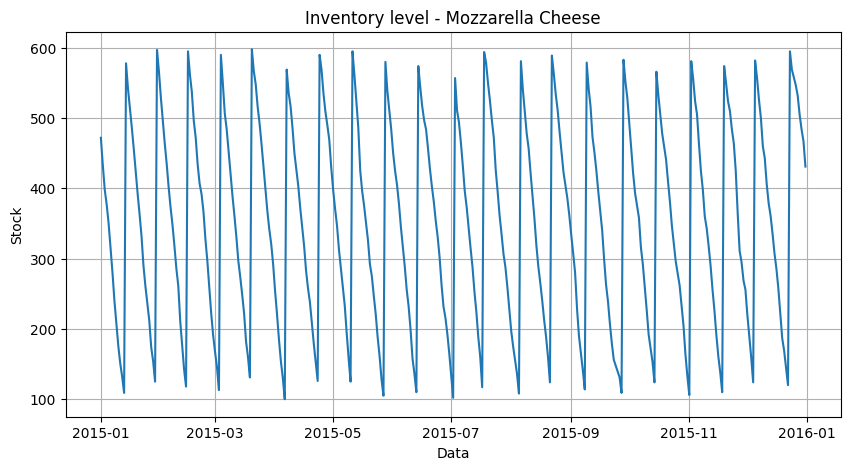

In [55]:
#graph example (Mozzarella)

ingredient_to_plot = "Mozzarella Cheese"
plot_data = stock_df[stock_df["ingredient"] == ingredient_to_plot]

plt.figure(figsize=(10,5))
plt.plot(plot_data["date"], plot_data["stock"])
plt.title(f"Inventory level - {ingredient_to_plot}")
plt.xlabel("Data")
plt.ylabel("Stock")
plt.grid(True)
plt.show()